In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
d1=pd.read_csv("time_series_covid19_confirmed_global.csv")
d2=pd.read_csv("time_series_covid19_deaths_global.csv")
d3=pd.read_csv("time_series_covid19_recovered_global.csv")

In [6]:
d1.set_index("Country/Region",inplace=True)
d1=d1.groupby("Country/Region").sum()
d1.drop(["Lat","Long"],axis=1,inplace=True)

In [7]:
d2.set_index("Country/Region",inplace=True)
d2=d2.groupby("Country/Region").sum()
d2.drop(["Lat","Long"],axis=1,inplace=True)

In [8]:
d3.set_index("Country/Region",inplace=True)
d3=d3.groupby("Country/Region").sum()
d3.drop(["Lat","Long"],axis=1,inplace=True)

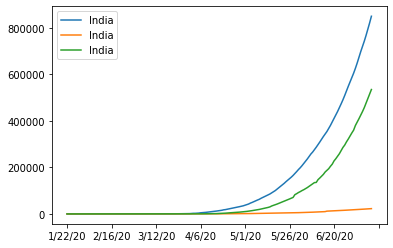

In [21]:
d1.loc["India"].plot() # symptomatic 
d2.loc["India"].plot() # dead
d3.loc["India"].plot() # recovered
plt.legend()
plt.show()

# Model used to simulate pandemic 

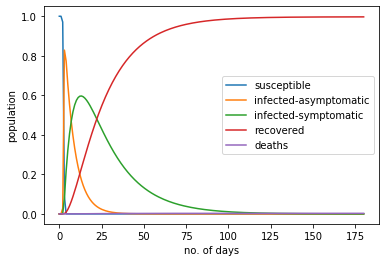

In [28]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math
from scipy.integrate import odeint
c1=6 # contacts for asymptomatic infected 
c2=2 # contacts for symptomatic infected
gamma=1/6 # rate for asymptomatic to symptomatic 
pop=4600000
nu1=(1/20) * 0.997
nu2=(1/20) * 0.003
def du_dt(u,t):
    lamda=(c1*u[1]+c2*u[2])/pop
    return([-u[0]*(lamda),u[1]*c1*u[0]/pop - gamma*u[1] ,u[0]*u[2]*c2/pop + gamma*u[1] -(nu1+nu2)*u[2],nu1*u[2],nu2*u[2]])
x=np.linspace(0,180,179)
y0=[pop-1,1,0,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected-asymptomatic")
plt.plot(x,y[:,2]/pop,label="infected-symptomatic")
plt.plot(x,y[:,3]/pop,label="recovered")
plt.plot(x,y[:,4]/pop,label="deaths")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

In [18]:
x=np.linspace(1,173,172)

In [100]:
x1=d1.loc["Spain"]
x2=d2.loc["Spain"]
x3=d3.loc["Spain"]
x4=x1-x2-x3
x5=[0]
for i in range(1,len(x4)):
    x5.append(x5[i-1]+x4[i])

In [112]:
pop=46.8*(1000000)
def func(x,c1,c2,gamma,nu1,nu2):
    def du_dt(u,t):
        lamda=(c1*u[1]+c2*u[2])/pop
        return([-u[0]*(lamda),u[1]*c1*u[0]/pop - gamma*u[1] ,u[0]*u[2]*c2/pop + gamma*u[1] -(nu1+nu2)*u[2],nu1*u[2],nu2*u[2]])
    x=np.linspace(1,173,172)
    y0=[pop-1,1,0,0,0]
    y=odeint(du_dt,y0,x)
    return y[:,2]

Estimated Parameters [2.48254559e-01 1.86484019e-01 1.60609639e-03 2.76549043e-04
 8.79896584e-10]


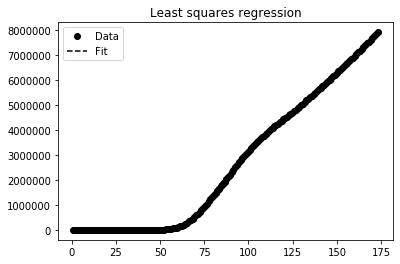

In [122]:
c1=0.24 # contacts for asymptomatic infected 
c2=0.18 # contacts for symptomatic infected
gamma=0.0016 # rate for asymptomatic to symptomatic 
nu1=(1/10) * 0.997
nu2=(1/10) * 0.003
import scipy.optimize as opt
y_samp=np.array(x5)
x_lin=np.linspace(1,173,172)
p0 = [c1,c2,gamma,nu1,nu2]    # guessed params
w,_= opt.curve_fit(func, x_lin, y_samp, p0=p0,bounds=(0,[10,10,1,1,1]))     
print("Estimated Parameters", w)  
y_model = func(x_lin, *w)
plt.plot(x_lin, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left")
plt.show()

# This is the simulated data compared with data obtained from spain

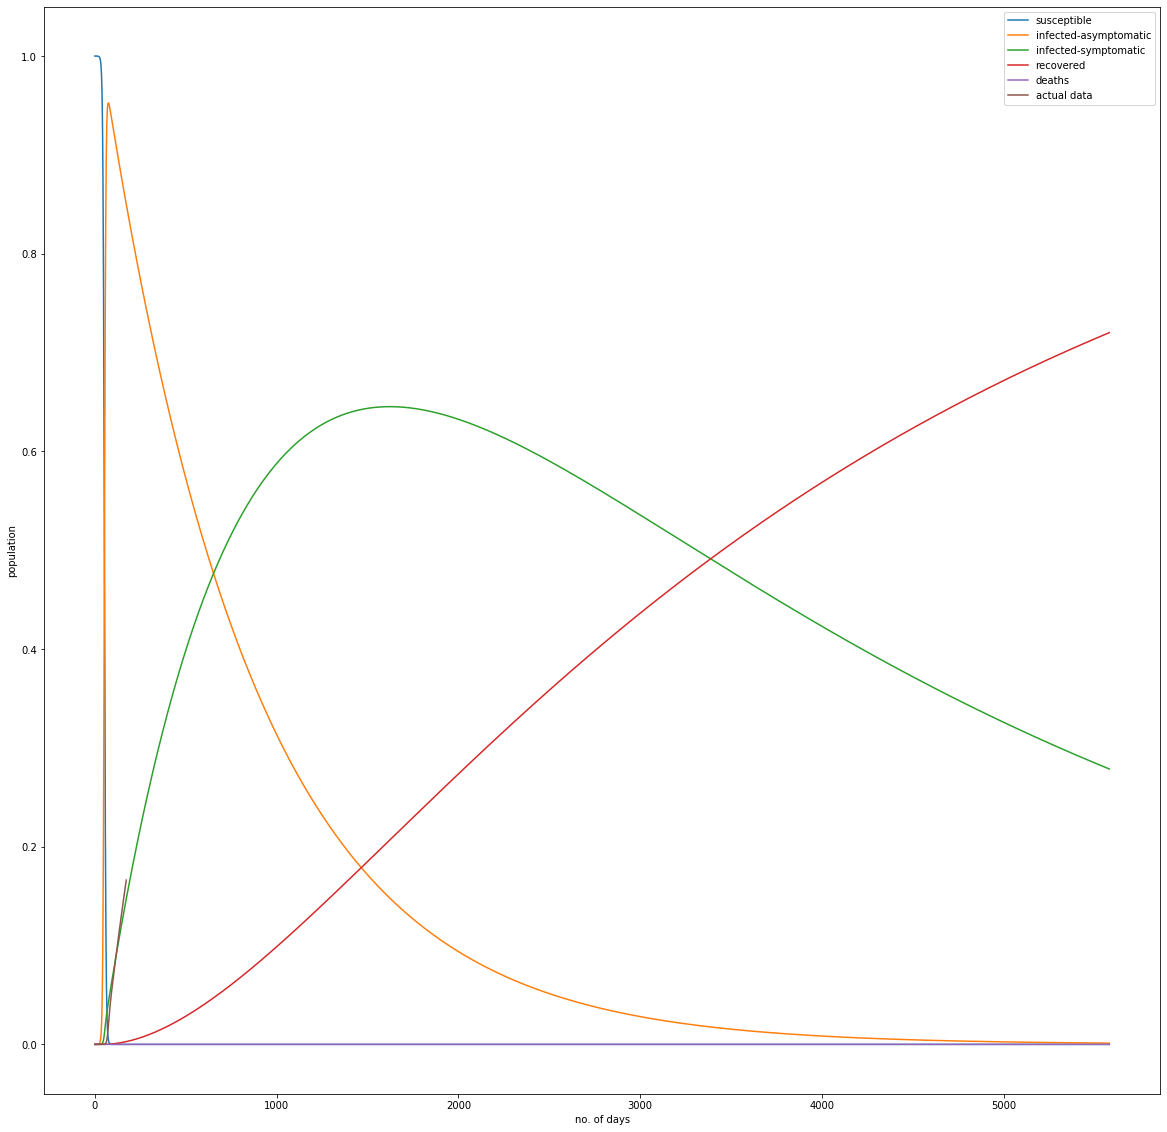

In [154]:
plt.figure(figsize=(20,20))
c1=0.248 # contacts for asymptomatic infected 
c2=0.186 # contacts for symptomatic infected
gamma=1.20609639e-03  # rate for asymptomatic to symptomatic 
nu1=2.76549043e-04
nu2-8.79896584e-10
def du_dt(u,t):
    lamda=(c1*u[1]+c2*u[2])/pop
    return([-u[0]*(lamda),u[1]*c1*u[0]/pop - gamma*u[1] ,u[0]*u[2]*c2/pop + gamma*u[1] -(nu1+nu2)*u[2],nu1*u[2],nu2*u[2]])
x=np.linspace(0,5580,5579)
y0=[pop-1,100,1,0,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0]/pop,label="susceptible")
plt.plot(x,y[:,1]/pop,label="infected-asymptomatic")
plt.plot(x,y[:,2]/pop,label="infected-symptomatic")
plt.plot(x,y[:,3]/pop,label="recovered")
plt.plot(x,y[:,4]/pop,label="deaths")
plt.plot(x_lin,y_model/pop,label="actual data")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()